## Project 2

1. Use Python/pandas for everything

2. You can use a spreadsheet program for simple preparation like extracting a table from a larger sheet (explain in the notebook if you do this), but all data cleaning, merging, visualizations, etc. should be done in code.

3. Data from two datasets is reflected in a single visualization. There can be additional visualizations

4. State the takeaway(s)

In [1]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

In [3]:
import pandas as pd

In [5]:
#import first dataset
gdp = pd.read_csv('gdp.csv')
gdp.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [7]:
print(gdp.columns.tolist())

['Country Name', 'Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65']


In [9]:
gdp.dtypes

Country Name     object
Code             object
1960            float64
1961            float64
1962            float64
                 ...   
2017            float64
2018            float64
2019            float64
2020            float64
Unnamed: 65     float64
Length: 64, dtype: object

In [11]:
gdp_cleaned = gdp[['Country Name','Code','2020']].dropna(subset=['2020']).rename(columns={'2020': 'GDP(b$)', 'Code': 'Country Code'})
gdp_cleaned['GDP(b$)'] = gdp_cleaned['GDP(b$)'] / 1000000000
gdp_cleaned.head()

,Country Name,Country Code,GDP(b$)
1,Africa Eastern and Southern,AFE,920.792332
2,Afghanistan,AFG,20.116137
3,Africa Western and Central,AFW,784.587603
4,Angola,AGO,58.375976
5,Albania,ALB,14.887629


<Axes: title={'center': 'GDP by country (2020)'}, xlabel='Country Code', ylabel='GDP(b$)'>

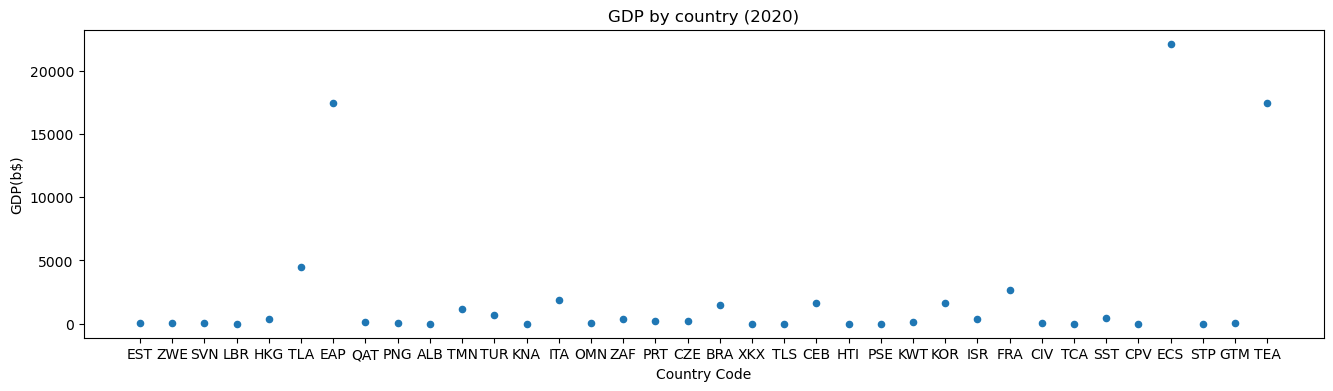

In [13]:
#visualizing GDP data (randomly select 36 countries)
gdp_cleaned_vis=gdp_cleaned.sample(n=36,random_state=1)
gdp_cleaned_vis.plot.scatter(x='Country Code',y='GDP(b$)',title='GDP by country (2020)', figsize=(16,4))

The scatter plot visualizes GDP values for 36 randomly selected countries in 2020. The x-axis displays the country codes (abbreviations), while the y-axis represents the corresponding GDP values in billion USD. 

Most countries in the sample exhibit GDP values around 1 trillion USD. However, ECS (Europe & Central Asia), EAP (East Asia & Pacific, excluding high income), and TEA (East Asia & Pacific, IDA & IBRD countries) stand out with exceptionally high GDPs, as they represent aggregated regional GDPs (the sum of GDPs from multiple countries) rather than individual nations. 

These regional entries could be excluded in our subsequent steps, especially when merging with a dataset containing only individual countries, to ensure consistency and accuracy in analysis.

In [15]:
#import second dataset
demographics = pd.read_csv('demographics.csv')
demographics.head()

,country,Region,Adults (ages 15+) and children (ages 0-14) newly infected with HIV,Adults (ages 15-49) newly infected with HIV,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),"Automated teller machines (ATMs) (per 100,000 adults)",...,Population density (people per sq. km of land area),Population growth (annual %),"Population, female","Population, male","Population, total",Ratio of female to male labor force participation rate (%) (national estimate),"Total reserves (includes gold, current US$)","Unemployment, total (% of total labor force) (modeled ILO estimate)",Urban population,Women Business and the Law Index Score (scale 1-100)
0,Algeria,NorthernAfrica,1700.0,1400.0,60.067725,10.793250,49.274474,NaN,5.490000e+08,NaN,...,18.411340,1.836534,21697235,22153808,43851043,NaN,5.943439e+10,12.83,32332690,57.500
1,Argentina,SouthAmerica,5600.0,5000.0,55.767661,17.705349,38.062312,NaN,7.000000e+06,62.451861,...,16.580893,0.970054,23239321,22137442,45376763,NaN,3.940373e+10,11.67,41796990,76.250
2,Australia,Oceania,750.0,1000.0,55.051941,25.138662,29.913279,396000000.0,1.658000e+09,129.692233,...,3.339440,1.258698,12895213,12791828,25687041,85.979440,4.301263e+10,6.61,22152761,96.875
3,Austria,WesternEurope,NaN,NaN,50.639108,28.928737,21.710371,9000000.0,1.300000e+07,167.949809,...,108.061137,0.419001,4521483,4395722,8917205,84.086444,3.043956e+10,5.77,5238680,96.875
4,Bangladesh,SouthernAsia,NaN,NaN,47.018923,7.684684,39.334238,NaN,4.600000e+07,10.184245,...,1265.186932,1.002774,81430275,83259108,164689383,NaN,4.317174e+10,5.30,62873466,49.375


In [16]:
print(demographics.columns.tolist())

['country', 'Region', 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV', 'Adults (ages 15-49) newly infected with HIV', 'Age dependency ratio (% of working-age population)', 'Age dependency ratio, old (% of working-age population)', 'Age dependency ratio, young (% of working-age population)', 'Arms exports (SIPRI trend indicator values)', 'Arms imports (SIPRI trend indicator values)', 'Automated teller machines (ATMs) (per 100,000 adults)', 'Average transaction cost of sending remittances from a specific country (%)', 'Average transaction cost of sending remittances to a specific country (%)', 'Bank capital to assets ratio (%)', 'Bank liquid reserves to bank assets ratio (%)', 'Bank nonperforming loans to total gross loans (%)', 'Charges for the use of intellectual property, payments (BoP, current US$)', 'Charges for the use of intellectual property, receipts (BoP, current US$)', 'Commercial bank branches (per 100,000 adults)', 'Computer, communications and other ser

In [17]:
demographics.dtypes

country                                                                            object
Region                                                                             object
Adults (ages 15+) and children (ages 0-14) newly infected with HIV                float64
Adults (ages 15-49) newly infected with HIV                                       float64
Age dependency ratio (% of working-age population)                                float64
                                                                                   ...   
Ratio of female to male labor force participation rate (%) (national estimate)    float64
Total reserves (includes gold, current US$)                                       float64
Unemployment, total (% of total labor force) (modeled ILO estimate)               float64
Urban population                                                                    int64
Women Business and the Law Index Score (scale 1-100)                              float64
Length: 61

In [18]:
demo_cleaned = demographics[['country','Military expenditure (% of GDP)','Population, total']].dropna(subset=['Military expenditure (% of GDP)']).rename(columns={'country': 'Country Name', 'Population, total': 'Population (MM)'})
demo_cleaned['Population (MM)'] = demo_cleaned['Population (MM)'] / 1000000
demo_cleaned.head()

,Country Name,Military expenditure (% of GDP),Population (MM)
0,Algeria,6.659994,43.851043
1,Argentina,0.761487,45.376763
2,Australia,2.063043,25.687041
3,Austria,0.836614,8.917205
4,Bangladesh,1.301863,164.689383


In [19]:
#merge the two dataset
finaldata = pd.merge(gdp_cleaned, demo_cleaned, on='Country Name')
finaldata

,Country Name,Country Code,GDP(b$),Military expenditure (% of GDP),Population (MM)
0,Argentina,ARG,389.288056,0.761487,45.376763
1,Australia,AUS,1327.836171,2.063043,25.687041
2,Austria,AUT,433.258468,0.836614,8.917205
3,Belgium,BEL,521.861293,1.080842,11.555997
4,Bangladesh,BGD,323.056958,1.301863,164.689383
5,Belarus,BLR,60.258239,1.254281,9.398861
6,Brazil,BRA,1444.733259,1.439168,212.559409
7,Canada,CAN,1645.423408,1.415056,38.005238
8,Switzerland,CHE,752.248046,0.778521,8.636896
9,Chile,CHL,252.940023,1.853907,19.116209


<Axes: title={'center': 'GDP & Military Expenditure per country (Bubble size=population)'}, xlabel='GDP(b$)', ylabel='Military expenditure (% of GDP)'>

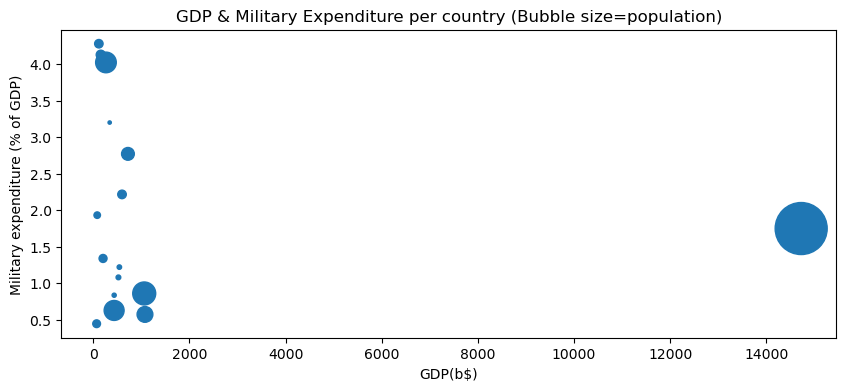

In [21]:
#reflected two datasets in a single visualization (randomly select 16 countries)
finaldata_vis=finaldata.sample(n=16,random_state=1)
finaldata_vis.plot.scatter(x='GDP(b$)', y='Military expenditure (% of GDP)', s=finaldata_vis['Population (MM)'], title='GDP & Military Expenditure per country (Bubble size=population)', figsize=(10,4))

In [27]:
#We can use matplot to make the bubble plot more visually appealing 
import matplotlib.pyplot as plt

/var/folders/x3/75dks2ms4mj19ymjp6xcxjjm0000gn/T/ipykernel_44587/3822508408.py:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



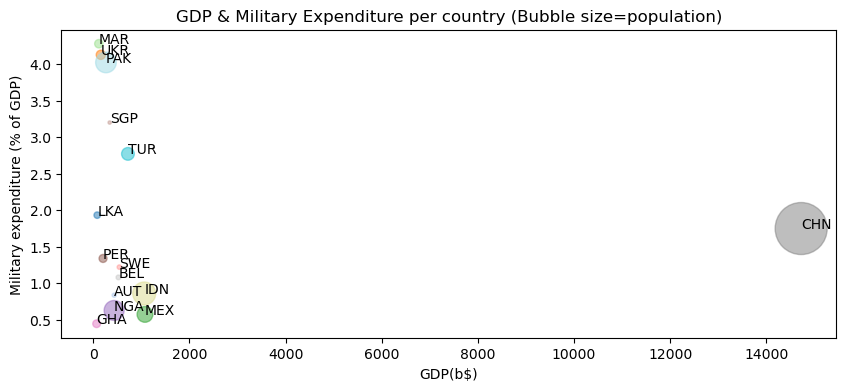

In [28]:
finaldata_vis=finaldata.sample(n=15,random_state=1)

color_map = plt.cm.get_cmap('tab20', len(finaldata_vis))
finaldata_vis.plot.scatter(x='GDP(b$)', y='Military expenditure (% of GDP)', s=finaldata_vis['Population (MM)'], alpha=0.5, figsize=(10,4), c=color_map.colors,  title='GDP & Military Expenditure per country (Bubble size=population)')
for i, row in finaldata_vis.iterrows():
    plt.text(row['GDP(b$)'], row['Military expenditure (% of GDP)'], row['Country Code'])

This bubble plot illustrates the relationship between GDP (in billions of USD) and military expenditure as a percentage of GDP for various countries.

The x-axis represents GDP in billions of USD, indicating the economic size of each country. The y-axis shows military expenditure as a percentage of GDP, reflecting the proportion of economic output allocated to defense. And each bubble represents a country, with the size of the bubble corresponding to the country’s population. Larger bubbles indicate more populous countries.

We didnot see a clear linear relationship between GDP and military expenditure. This can be attributed to several reasons. First, military spending is influenced by factors such as geopolitical tensions, defense policies, and security concerns, which vary significantly across countries. For example, countries facing regional conflicts or border disputes (e.g., Pakistan, Ukraine) might allocate a higher percentage of their GDP to military spending regardless of their economic size. Second, larger economies (like China) tend to have a more diversified allocation of resources, often emphasizing infrastructure, healthcare, or education rather than disproportionately high military spending. This results in a lower military expenditure as a percentage of GDP, even if the absolute spending amount is significant. Finally, our plot includes only 15 countries. By including data from more countries, we could better identify potential trends or patterns in the relationship.